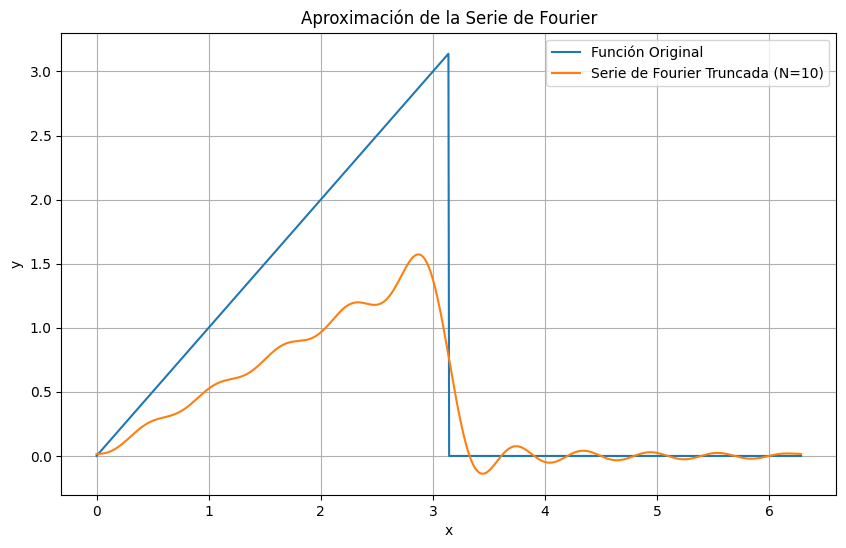

Periodo de la función: 6.283185307179586
Coeficientes de la serie de Fourier (N=10):
a_0 = 0.7853981633974483
a_1 = -0.3183098861837907
b_1 = 0.5
a_2 = 5.551115123125783e-17
b_2 = -0.24999999999999994
a_3 = -0.03536776513153232
b_3 = 0.16666666666666663
a_4 = -5.551115123125783e-17
b_4 = -0.12499999999999997
a_5 = -0.012732395447351507
b_5 = 0.09999999999999996
a_6 = 3.423513719630869e-17
b_6 = -0.0833333333333335
a_7 = -0.00649612012619987
b_7 = 0.07142857142857134
a_8 = -8.673617379884035e-17
b_8 = -0.06249999999999996
a_9 = -0.003929751681281129
b_9 = 0.055555555555555615
a_10 = -1.766974823035287e-17
b_10 = -0.05
Ecuación de la serie de Fourier (N=10):


NameError: ignored

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define la función continua por partes que deseas analizar.
def f(x):
    if x < 0:
        return 0
    elif x < np.pi:
        return x
    else:
        return 0

# Parámetros
N = 10  # Número de términos en la serie de Fourier
T = 2 * np.pi  # Periodo de la función
omega_0 = 2 * np.pi / T  # Frecuencia fundamental

# Coeficientes de la serie de Fourier
def coeficiente_a(n):
    integrando = lambda x: f(x) * np.cos(n * omega_0 * x)
    resultado, _ = quad(integrando, 0, T)
    return (1 / T) * resultado

def coeficiente_b(n):
    integrando = lambda x: f(x) * np.sin(n * omega_0 * x)
    resultado, _ = quad(integrando, 0, T)
    return (1 / T) * resultado

# Cálculo de la serie de Fourier truncada
def serie_fourier(x, N):
    a_0 = (1 / T) * quad(f, 0, T)[0]
    suma = a_0 / 2
    for n in range(1, N + 1):
        suma += coeficiente_a(n) * np.cos(n * omega_0 * x) + coeficiente_b(n) * np.sin(n * omega_0 * x)
    return suma

# Valores de x para la gráfica
x_values = np.linspace(0, 2 * np.pi, 1000)
y_values = [serie_fourier(x, N) for x in x_values]

# Gráfica de la función original y la serie de Fourier truncada
plt.figure(figsize=(10, 6))
plt.plot(x_values, [f(x) for x in x_values], label='Función Original')
plt.plot(x_values, y_values, label=f'Serie de Fourier Truncada (N={N})')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximación de la Serie de Fourier')
plt.grid(True)
plt.show()

# Mostrar el periodo, coeficientes y ecuación de la serie de Fourier
print(f'Periodo de la función: {T}')
print(f'Coeficientes de la serie de Fourier (N={N}):')
for n in range(0, N + 1):
    print(f'a_{n} = {coeficiente_a(n)}')
    if n != 0:
        print(f'b_{n} = {coeficiente_b(n)}')
print(f'Ecuación de la serie de Fourier (N={N}):')
print(f'f(x) = {a_0/2} + ', end='')
for n in range(1, N + 1):
    print(f'{coeficiente_a(n)} * cos({n} * {omega_0} * x) + {coeficiente_b(n)} * sin({n} * {omega_0} * x)', end=' ')
print()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import tkinter as tk
from tkinter import ttk

def calculate_fourier():
    # Obtener la función ingresada por el usuario
    input_function = function_entry.get()

    # Convertir la entrada en una función evaluable
    try:
        f = lambda x: eval(input_function)
    except:
        result_label.config(text="Error en la función")
        return

    # Parámetros
    N = int(N_entry.get())
    T = float(period_entry.get())
    omega_0 = 2 * np.pi / T

    # Coeficientes de la serie de Fourier
    def coeficiente_a(n):
        integrando = lambda x: f(x) * np.cos(n * omega_0 * x)
        resultado, _ = quad(integrando, 0, T)
        return (1 / T) * resultado

    def coeficiente_b(n):
        integrando = lambda x: f(x) * np.sin(n * omega_0 * x)
        resultado, _ = quad(integrando, 0, T)
        return (1 / T) * resultado

    # Cálculo de la serie de Fourier truncada
    def serie_fourier(x, N):
        a_0 = (1 / T) * quad(f, 0, T)[0]
        suma = a_0 / 2
        for n in range(1, N + 1):
            suma += coeficiente_a(n) * np.cos(n * omega_0 * x) + coeficiente_b(n) * np.sin(n * omega_0 * x)
        return suma

    # Valores de x para la gráfica
    x_values = np.linspace(0, T, 1000)
    y_values = [serie_fourier(x, N) for x in x_values]

    # Gráfica de la función original y la serie de Fourier truncada
    plt.figure(figsize=(6, 4))
    plt.plot(x_values, [f(x) for x in x_values], label='Función Original')
    plt.plot(x_values, y_values, label=f'Serie de Fourier Truncada (N={N})')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Aproximación de la Serie de Fourier')
    plt.grid(True)
    plt.savefig('fourier_plot.png')
    plt.close()

    # Mostrar el periodo, coeficientes y ecuación de la serie de Fourier
    result_label.config(text=f'Periodo de la función: {T}\n'
                              f'Coeficientes de la serie de Fourier (N={N}):\n'
                              f'Ecuación de la serie de Fourier (N={N}):\n')

    for n in range(0, N + 1):
        result_label.config(text=result_label.cget("text") +
                              f'a_{n} = {coeficiente_a(n)}\n')
        if n != 0:
            result_label.config(text=result_label.cget("text") +
                                  f'b_{n} = {coeficiente_b(n)}\n')

    result_label.config(text=result_label.cget("text") +
                          f'f(x) = {a_0/2} + ')
    for n in range(1, N + 1):
        result_label.config(text=result_label.cget("text") +
                              f'{coeficiente_a(n)} * cos({n} * {omega_0} * x) + {coeficiente_b(n)} * sin({n} * {omega_0} * x) ')

    result_label.config(text=result_label.cget("text") +
                          f'\n\nGráfica guardada en fourier_plot.png')

# Crear la ventana principal
root = tk.Tk()
root.title("Calculadora de Serie de Fourier")

# Crear etiquetas y campos de entrada
function_label = tk.Label(root, text="Función (usando 'x' como variable independiente):")
function_label.pack()

function_entry = tk.Entry(root)
function_entry.pack()

period_label = tk.Label(root, text="Periodo (T):")
period_label.pack()

period_entry = tk.Entry(root)
period_entry.pack()

N_label = tk.Label(root, text="Valor de N:")
N_label.pack()

N_entry = tk.Entry(root)
N_entry.pack()

calculate_button = tk.Button(root, text="Calcular Serie de Fourier", command=calculate_fourier)
calculate_button.pack()

result_label = tk.Label(root, text="")
result_label.pack()

root.mainloop()


TclError: ignored